In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
 # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/BankChurners.csv


This article covers two fundamental techniques of feature selection:
Filter Methods and Wrapper Methods, as well as how EDA would guide decision making in feature selection.
  *Please visit [Feature Selection and EDA](https://towardsdatascience.com/feature-selection-and-eda-in-python-c6c4eb1058a3?source=post_stats_page-------------------------------------) for detailed code walkthrough*.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [28]:
# import dataset
df = pd.read_csv("../input/BankChurners.csv")
df = df.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], axis = 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
# describe data
df.describe(include = "all")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [30]:
# missing values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# EDA
* univariate analysis
* correlation analysis
* bivariate analysis

In [31]:
# populate list of numerical and categorical variables
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)
        

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
categorical: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


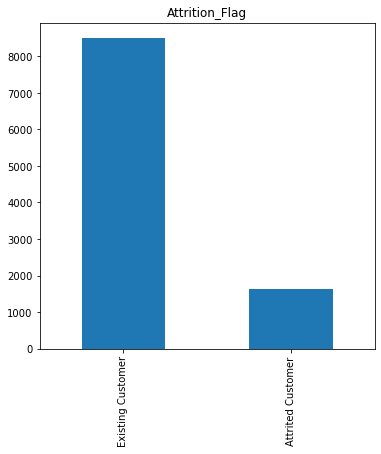

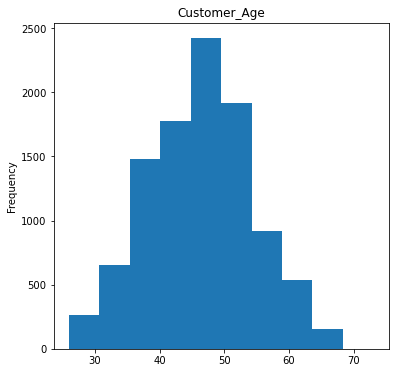

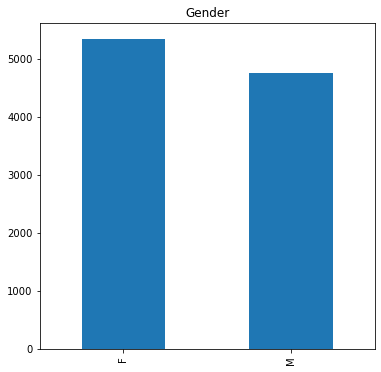

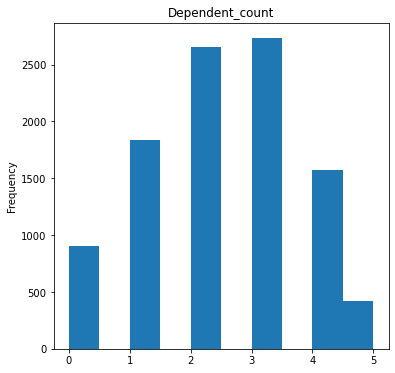

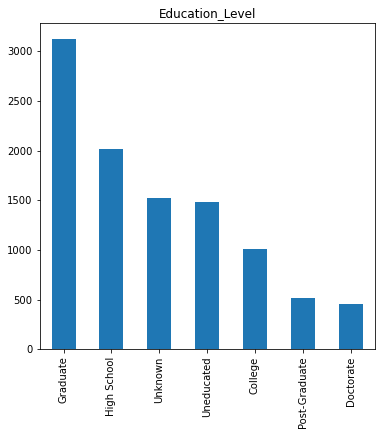

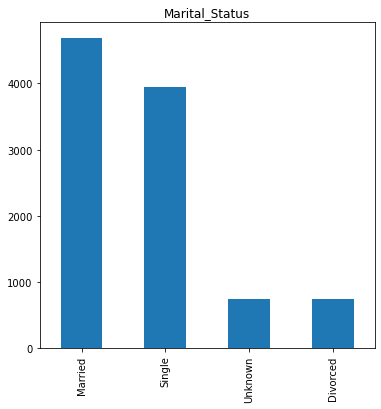

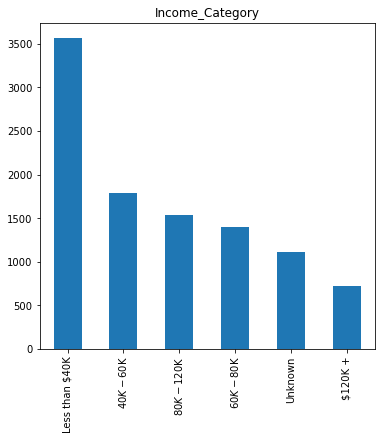

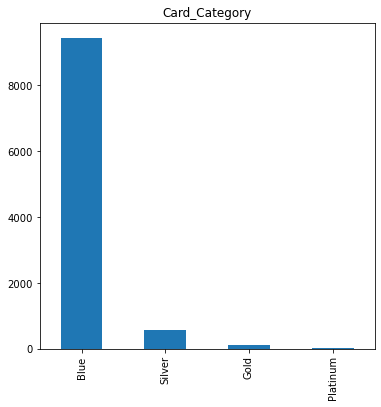

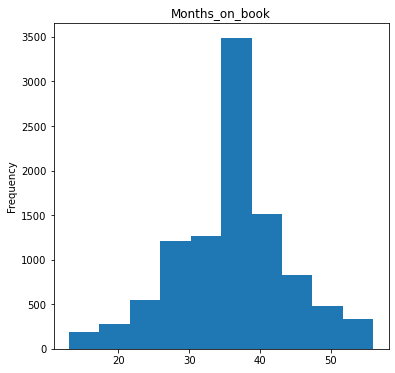

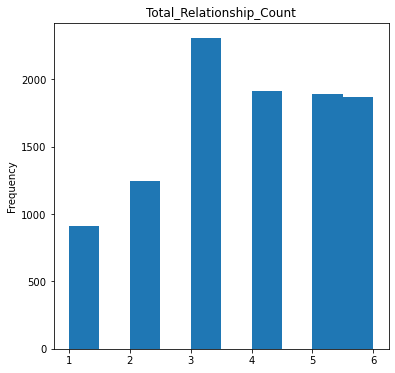

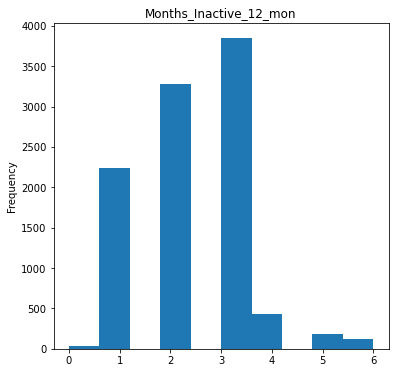

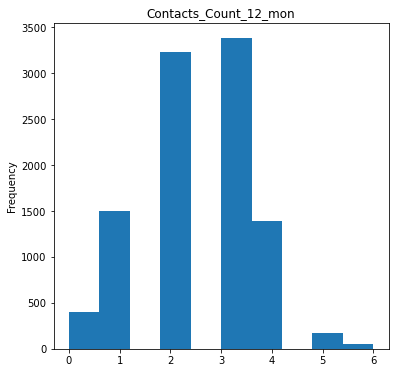

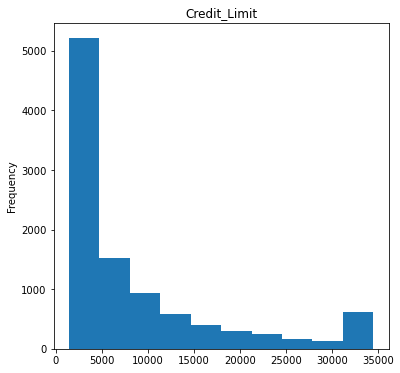

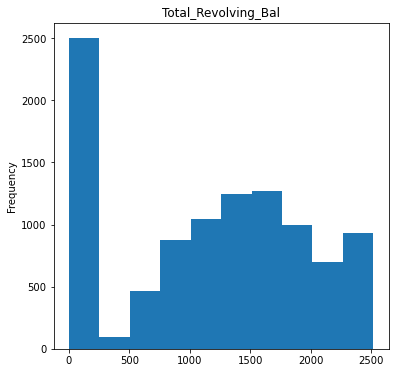

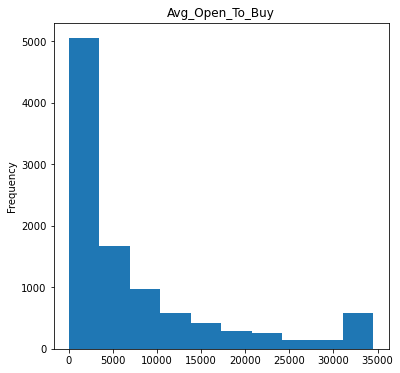

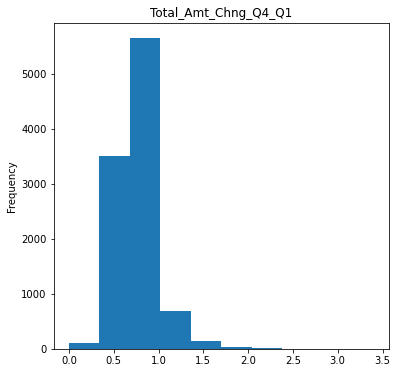

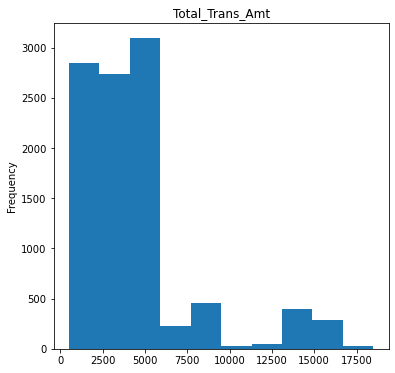

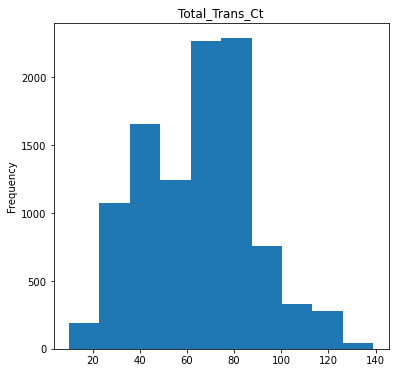

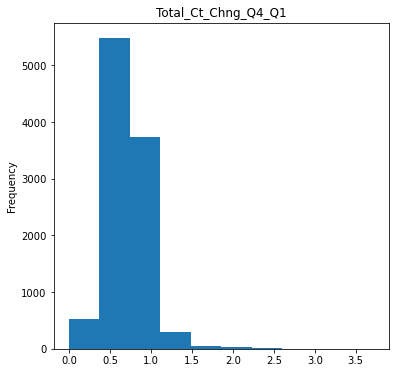

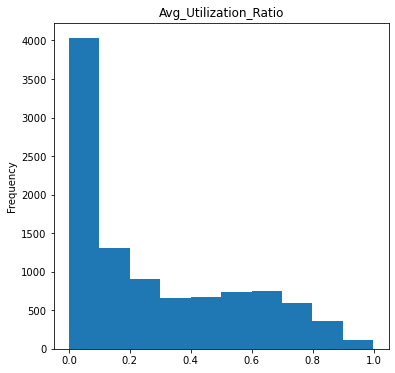

In [32]:
# univariate analysis
for column in df:
    plt.figure(column, figsize = (6,6))
    plt.title(column)
    
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
        
    elif is_string_dtype(df[column]):
        # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

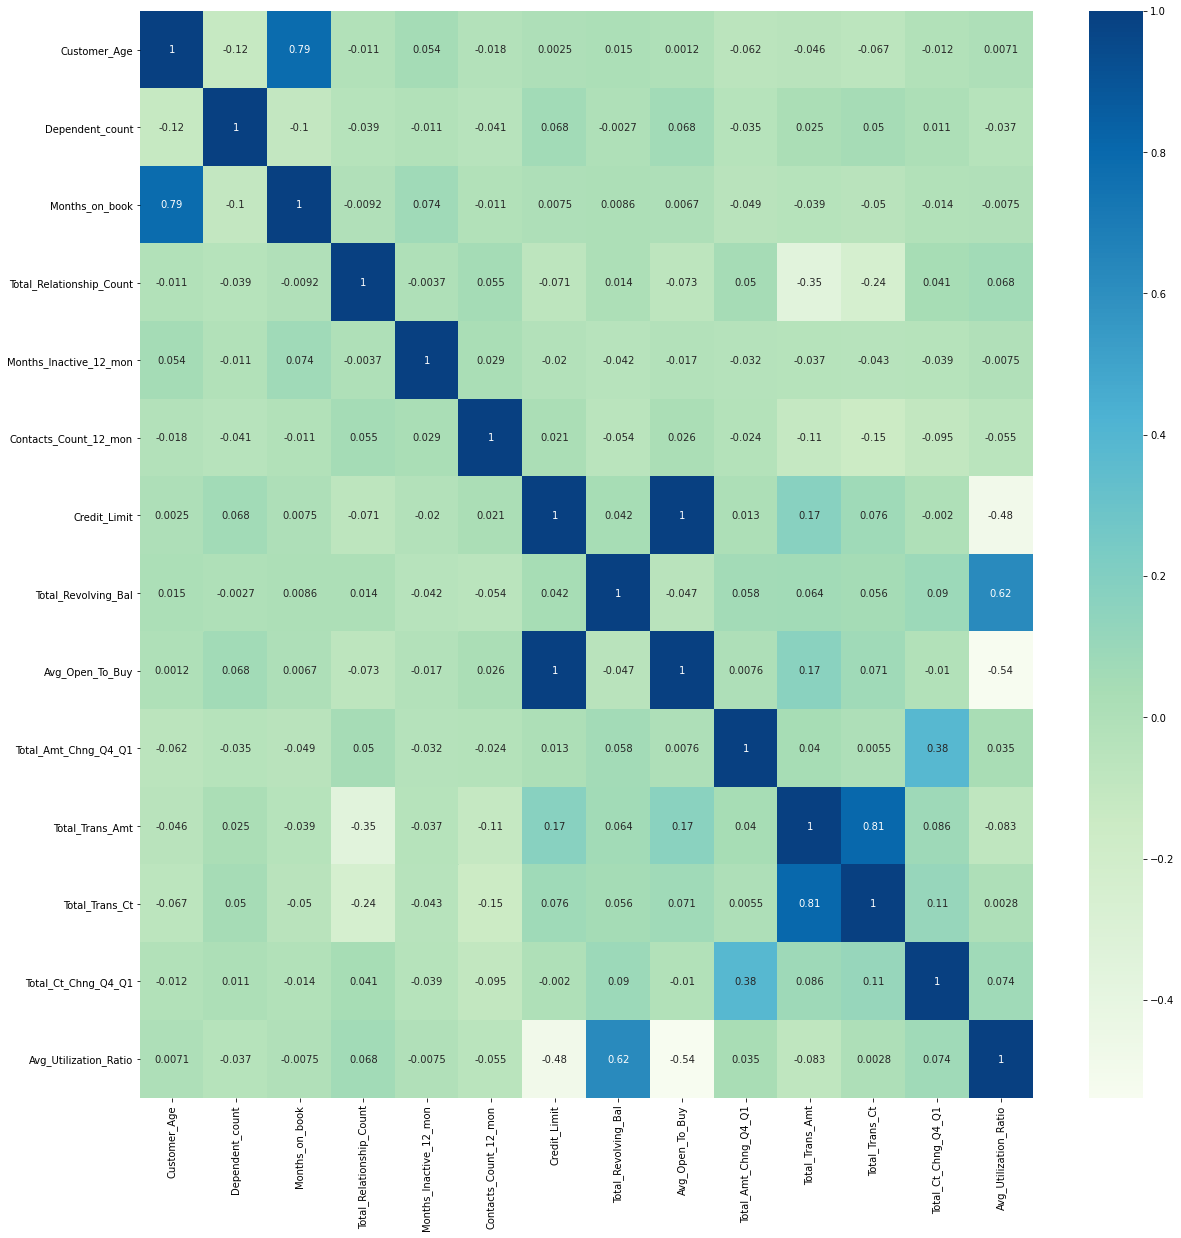

In [33]:
# correlation analysis
plt.figure(figsize = (20,20))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True);

In [34]:
# df = df.drop(columns=["Avg_Open_To_Buy", "Total_Trans_Ct", "Customer_Age"])

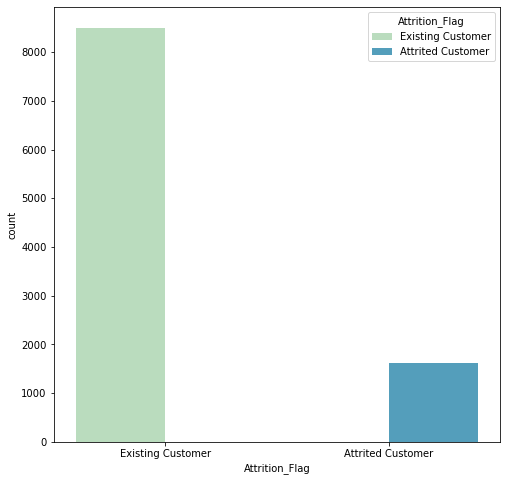

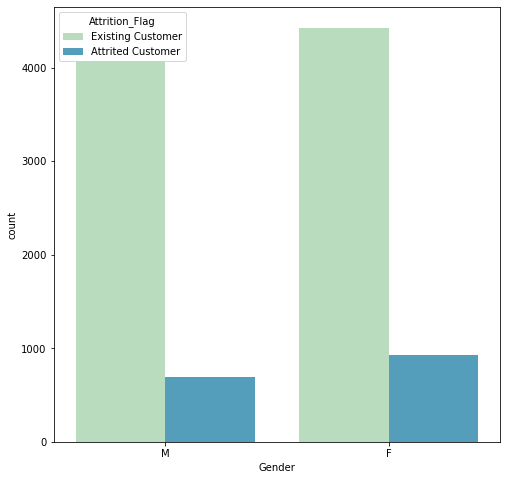

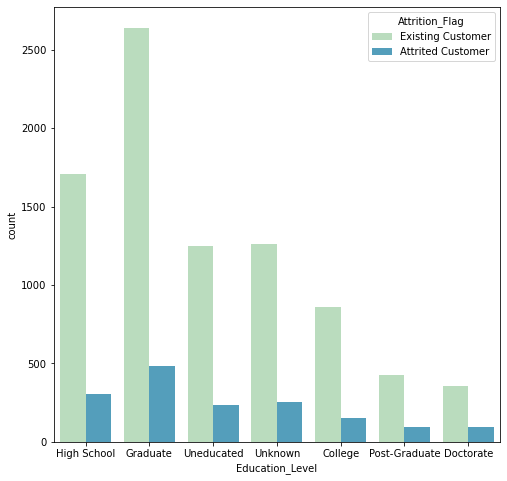

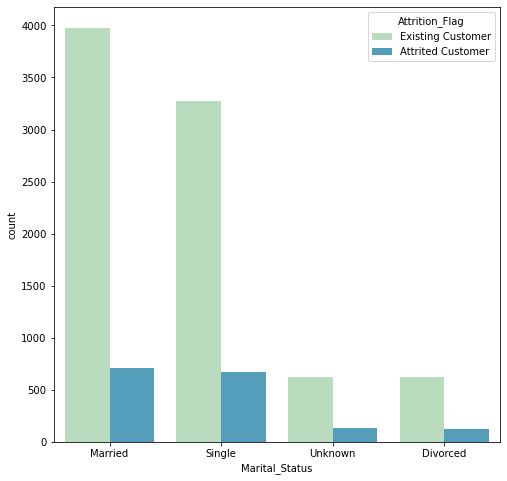

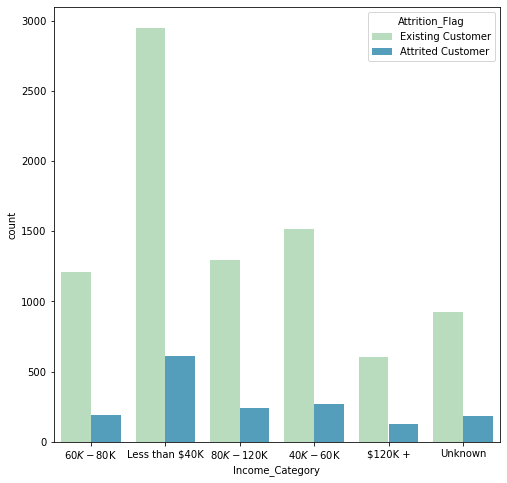

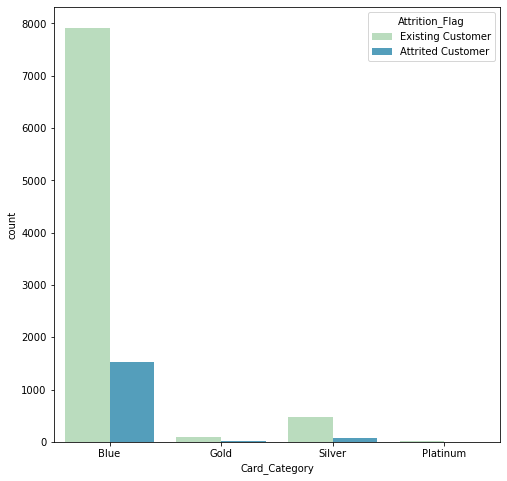

In [35]:
# grouped bar chart
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    plt.figure (figsize = (8,8))
    chart = sns.countplot(
        data = df,
        x= primary_cat, 
        hue= "Attrition_Flag",
        palette = 'GnBu',
    )

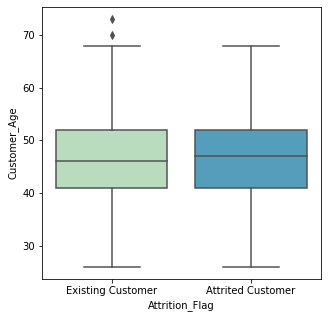

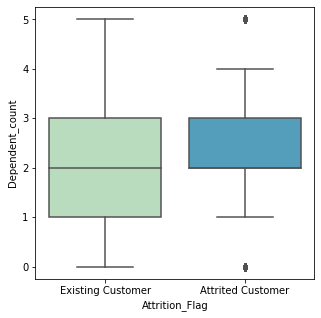

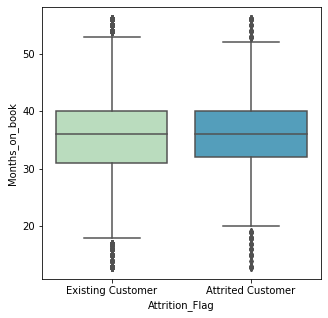

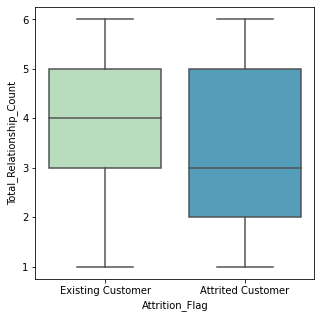

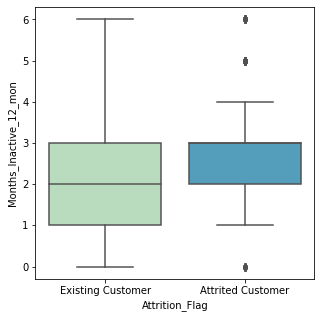

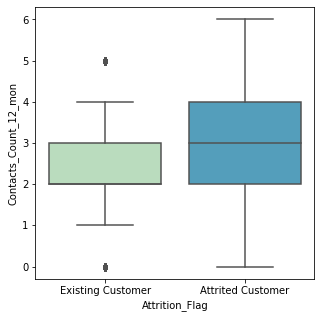

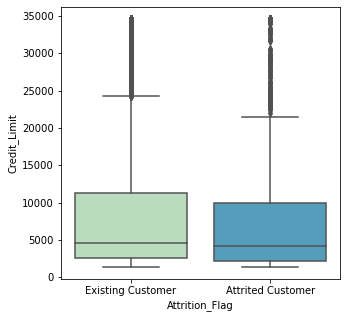

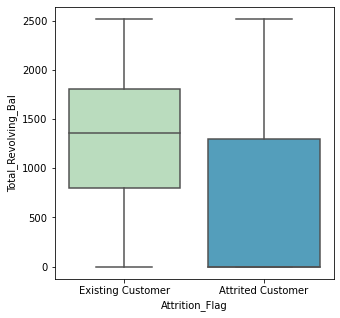

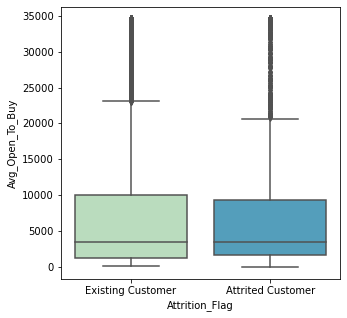

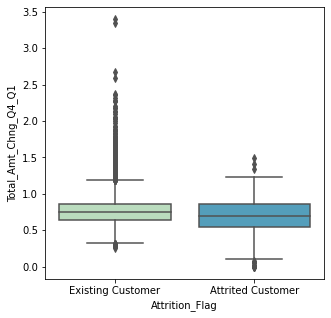

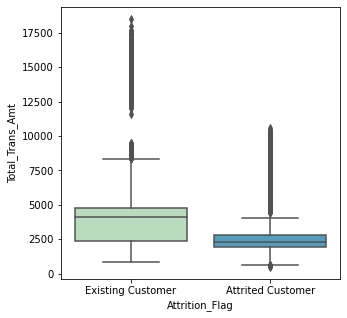

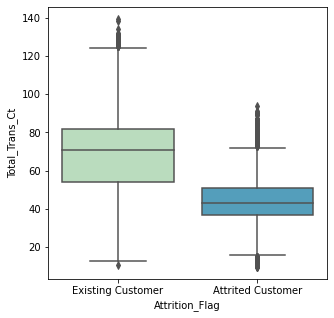

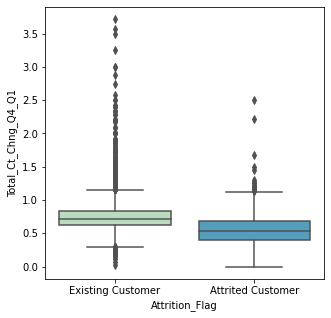

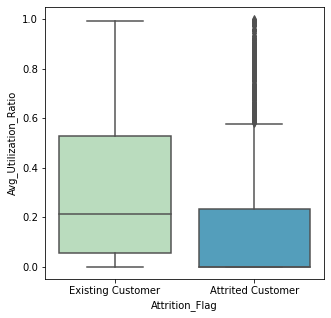

In [36]:
# box plot
for j in range(0, len(num_list)):
    cat = "Attrition_Flag"
    num = num_list[j]
    plt.figure (figsize = (5,5))
    sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")

# Filter Methods
* **chi square, anova and mutual information**
* how does the accuracy changes by chosen score functions and number of variables?
* how does each score function rate each features?

In [37]:
# encode columns
from sklearn.preprocessing import LabelEncoder

for i in cat_list:
    df[i] = LabelEncoder().fit_transform(df[i])

In [39]:
# feature scaling
from mlxtend.preprocessing import minmax_scaling

df_scaled = minmax_scaling(df, columns = df.columns.values)

In [41]:
from sklearn.model_selection import train_test_split

y = df_scaled["Attrition_Flag"]
X = df_scaled.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.columns.values)

(6785, 19) (3342, 19) (6785,) (3342,)
['Customer_Age' 'Gender' 'Dependent_count' 'Education_Level'
 'Marital_Status' 'Income_Category' 'Card_Category' 'Months_on_book'
 'Total_Relationship_Count' 'Months_Inactive_12_mon'
 'Contacts_Count_12_mon' 'Credit_Limit' 'Total_Revolving_Bal'
 'Avg_Open_To_Buy' 'Total_Amt_Chng_Q4_Q1' 'Total_Trans_Amt'
 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio']


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(X_train.shape)

print(metrics.accuracy_score(y_test, y_pred))

(6785, 19)
0.8964691801316577


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# define feature selection - filter methods function
def feature_selection(variable_counts,score_function):
    selection_model = SelectKBest(score_func=score_function, k=variable_counts) # create a selection model based on the score function
    selection = selection_model.fit(X_train, y_train) # fit the selection to the data
    features_selected = X_train.columns[selection.get_support()] # get the selected variables
    X_train_selected = selection_model.fit_transform(X_train, y_train) # transform the trainig data based on selected features
    
    # calculate the accuracy of prediction based on selected features
    reg = LogisticRegression()
    reg.fit(X_train_selected, y_train)
    y_pred = reg.predict(X_test[features_selected])
    
    return metrics.accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but Lo

    features count  accuracy      score function
0              1.0     0.838          chi square
1              2.0     0.860          chi square
2              3.0     0.859          chi square
3              4.0     0.859          chi square
4              5.0     0.875          chi square
5              6.0     0.884          chi square
6              7.0     0.886          chi square
7              8.0     0.895          chi square
8              9.0     0.893          chi square
9             10.0     0.894          chi square
10            11.0     0.891          chi square
11            12.0     0.892          chi square
12            13.0     0.892          chi square
13            14.0     0.893          chi square
14            15.0     0.894          chi square
15            16.0     0.894          chi square
16            17.0     0.893          chi square
17            18.0     0.894          chi square
18             1.0     0.834               anova
19             2.0  

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:xlabel='features count', ylabel='accuracy'>

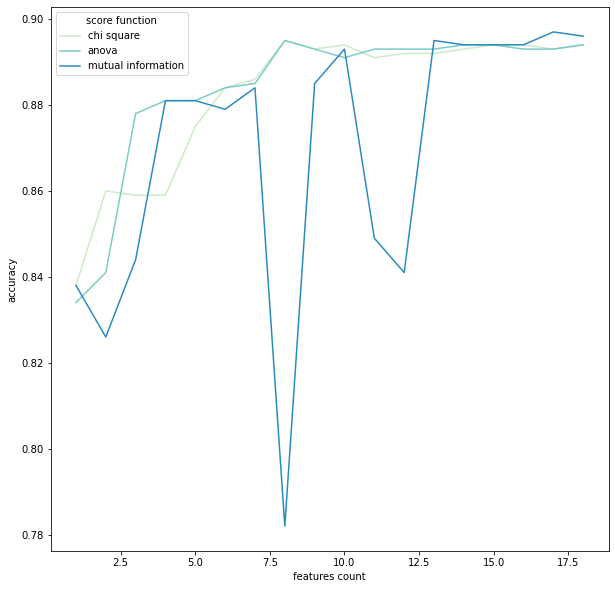

In [44]:
# create accuracy chart
accuracy_df = pd.DataFrame({"features count": [], "accuracy": [], "score function": []})
function_list = [chi2, f_classif,mutual_info_classif]
function_name = ["chi square", "anova", "mutual information"]

for j in range(len(function_list)): 
    func = function_list[j]
    func_name = function_name[j]
    for i in range(1, len(df.columns) - 1):
        accuracy = feature_selection(i, func)
        new_record = {"features count": round(i), "accuracy": round(accuracy, 3), "score function": func_name}
        accuracy_df = accuracy_df.append(new_record, ignore_index = True)

print(accuracy_df)
plt.figure(figsize = (10, 10))
sns.lineplot(data = accuracy_df, x = 'features count', y = 'accuracy', hue = 'score function', palette = "GnBu")

                    features      scores
12       Total_Revolving_Bal  114.587763
16            Total_Trans_Ct   78.159061
18     Avg_Utilization_Ratio   63.507099
15           Total_Trans_Amt   37.397359
10     Contacts_Count_12_mon   25.325780
8   Total_Relationship_Count   24.972220
9     Months_Inactive_12_mon   12.339693
17       Total_Ct_Chng_Q4_Q1   12.321170
1                     Gender    8.091111
11              Credit_Limit    2.419322
14      Total_Amt_Chng_Q4_Q1    2.229957
6              Card_Category    0.974002
5            Income_Category    0.939307
0               Customer_Age    0.681156
7             Months_on_book    0.234576
13           Avg_Open_To_Buy    0.125070
2            Dependent_count    0.061973
3            Education_Level    0.023031
4             Marital_Status    0.005932
AxesSubplot(0.125,0.125;0.775x0.755)
                    features       scores
16            Total_Trans_Ct  1161.417090
17       Total_Ct_Chng_Q4_Q1   642.341294
12       Total_Re

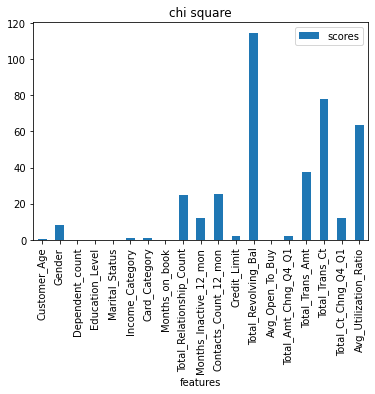

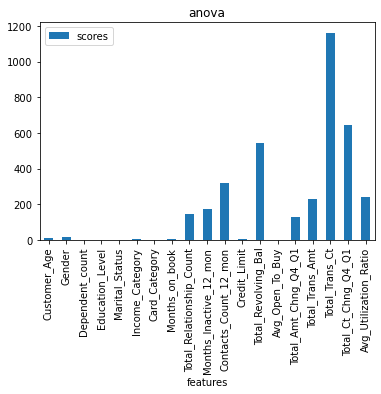

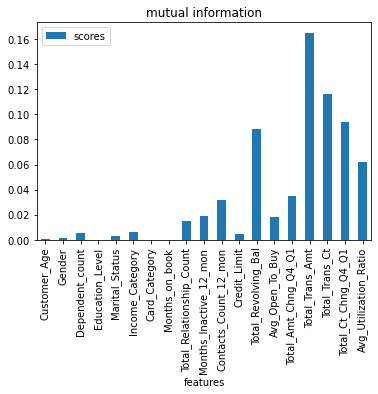

In [45]:
import pandas as pd
for i in range(len(function_list)):
    function = function_list[i]
    name = function_name[i]
    selection_model = SelectKBest(score_func = function, k = 8).fit(X_train, y_train)
    feature_score = pd.DataFrame({"features": X_train.columns.values, "scores": selection_model.scores_})
    print(feature_score.sort_values(by = ['scores'], ascending = False))
    print(feature_score.plot(x = "features", kind = 'bar', title = name))

# Wrapper Method
* **forward selection and backward elimination**
* how does the accuracy change by the number of variables?

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# forward selection
accuracy_df = pd.DataFrame({"features count": [], "accuracy": [], "score function": []})
for i in range(1, len(df.columns) - 1):
    sfs = SFS(LogisticRegression(),
              k_features = i,
              forward = True, 
              scoring = 'accuracy')
    
    X_train_selected = sfs.fit_transform(X_train, y_train)
    reg = LogisticRegression()
    reg.fit(X_train_selected, y_train)
    y_pred = reg.predict(X_test[list(sfs.k_feature_names_)])
    sfs_accuracy = metrics.accuracy_score(y_test, y_pred)
    
    new_record = {"features count": round(i), "accuracy": round(sfs_accuracy, 3), "score function": "forward selection"}
    accuracy_df = accuracy_df.append(new_record, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but Lo

In [ ]:
# backward elimination
for i in range(1, len(df.columns) - 1):
    sbs = SFS(LogisticRegression(),
              k_features = i,
              forward = False,
              # floating = False,
              scoring = 'accuracy')

    X_train_selected = sbs.fit_transform(X_train, y_train)
    reg = LogisticRegression()
    reg.fit(X_train_selected, y_train)
    y_pred = reg.predict(X_test[list(sbs.k_feature_names_)])
    sbs_accuracy = metrics.accuracy_score(y_test, y_pred)

    new_record = {"features count": round(i), "accuracy": round(sbs_accuracy, 3), "score function": "backward elimination"}
    accuracy_df = accuracy_df.append(new_record, ignore_index = True)
    
    
print(accuracy_df)
plt.figure(figsize = (10, 10))
sns.lineplot(data = accuracy_df, x = 'features count', y = 'accuracy', hue = 'score function', palette = "GnBu")